### Créer la matrice d'adjacence:

Avec un masque et des valeurs de tenseurs de diffusion

In [3]:
# ! pip  install nibabel
!python 1_build_adj_matrix.py ../data/simplePhantoms/fanning_2d_5bundles/wm_vf.nii.gz ../data/simplePhantoms/fanning_2d_5bundles/fods.nii.gz --threshold 0.02 graph

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.0076723  0.        ]
 [0.         0.         0.         ... 0.0076723  0.         0.01176861]
 [0.         0.         0.         ... 0.         0.01176861 0.        ]]
Figure(640x480)
node indices [ 305  361  362  363  413  414  415  416  417  418  419  468  469  470
  471  472  473  525  526  577  578  632  682  685  686  687  736  739
  740  746  747  788  789  790  791  795  798  799  800  801  843  844
  845  846  847  848  852  853  854  855  856  857  896  900  901  902
  904  905  906  907  908  909  910  911  912  950  951  952  954  956
  957  958  959  960  961  962  963  964  965  966 1003 1004 1005 1007
 1010 1012 1013 1014 1015 1016 1017 1018 1019 1020 1057 1058 1060 1067
 1068 1069 1070 1071 1073 1110

### Afficher le graphe: 

Figure(640x480)


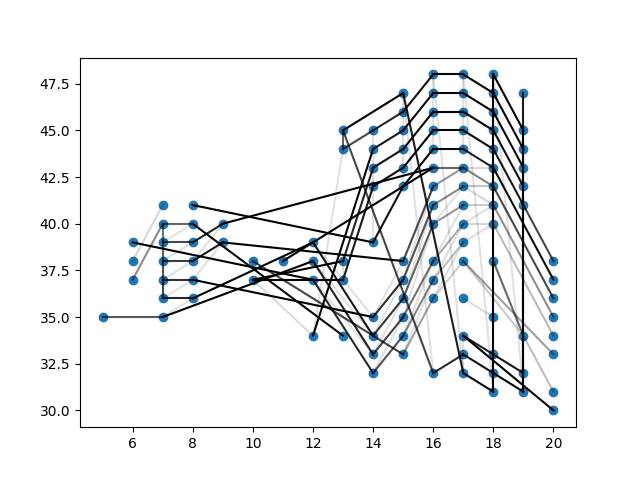

In [5]:
import sys

sys.path.append(r"C:\Users\harsh\quactography")

from IPython.display import Image, display  # type: ignore
!python 2_draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))




### Créer une matrice d'adjacence aléatoire:

In [6]:
!python 1_build_random_adj_matrix.py 7 7  False rand_graph

4
7


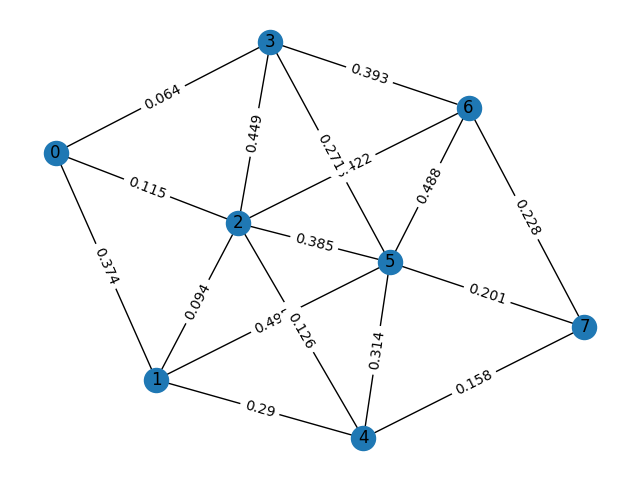

In [12]:
!python 2_draw_random_adj_matrix.py weighted_17_edges_rand_graph weighted_17_rand_graph_visu
display(Image(filename='weighted_17_rand_graph_visu.png'))

### Lancer l'algorithme de qaoa pour maximiser la valeur absolue des poids: 

nom de la matrice d'adjacence, noeud départ, noeud fin, nom du fichier d'infos, valeurs de la constante de pénalité, nombre de répétitions de QAOA, nombre de processeurs 

In [22]:
!python 3_find_max_intensity_diffusion_path.py weighted_17_edges_rand_graph 0 7 qaoa_solver_infos edge --alphas  1.5   --reps 1  -npr 1 --optimizer Differential --plt_cost_landscape False --refinement_loops 5

Edges present and connected to each int node: q([0, 3, 4, 5, 1, 3, 6, 7, 8, 9, 2, 6, 10, 11, 4, 7, 12, 13, 5, 8, 10, 12, 14, 15, 9, 11, 14, 16]) 
int edge pauli SparsePauliOp(['IIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZIII', 'IIIIIIIIIIIIZIIII', 'IIIIIIIIIIIZIIIII', 'IIIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZIII', 'IIIIIIIIIIZIIIIII', 'IIIIIIIIIZIIIIIII', 'IIIIIIIIZIIIIIIII', 'IIIIIIIZIIIIIIIII', 'IIIIIIIIIIIIIIZII', 'IIIIIIIIIIZIIIIII', 'IIIIIIZIIIIIIIIII', 'IIIIIZIIIIIIIIIII', 'IIIIIIIIIIIIZIIII', 'IIIIIIIIIZIIIIIII', 'IIIIZIIIIIIIIIIII', 'IIIZIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIII', 'IIIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIII', 'IIIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIIII', 'IIZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIIII'],
              coeffs=[ 3. +0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j,
 -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j,
 -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, 

memory allocation of 274877906944 bytes failed


In [9]:
import sys
import numpy as np 

sys.path.append(r"C:\Users\harsh\quactography")

file_opt_res = np.load("params_iterations.npz", allow_pickle=True)


### Visualiser les chemins qui maximise la valeur absolue des poids:

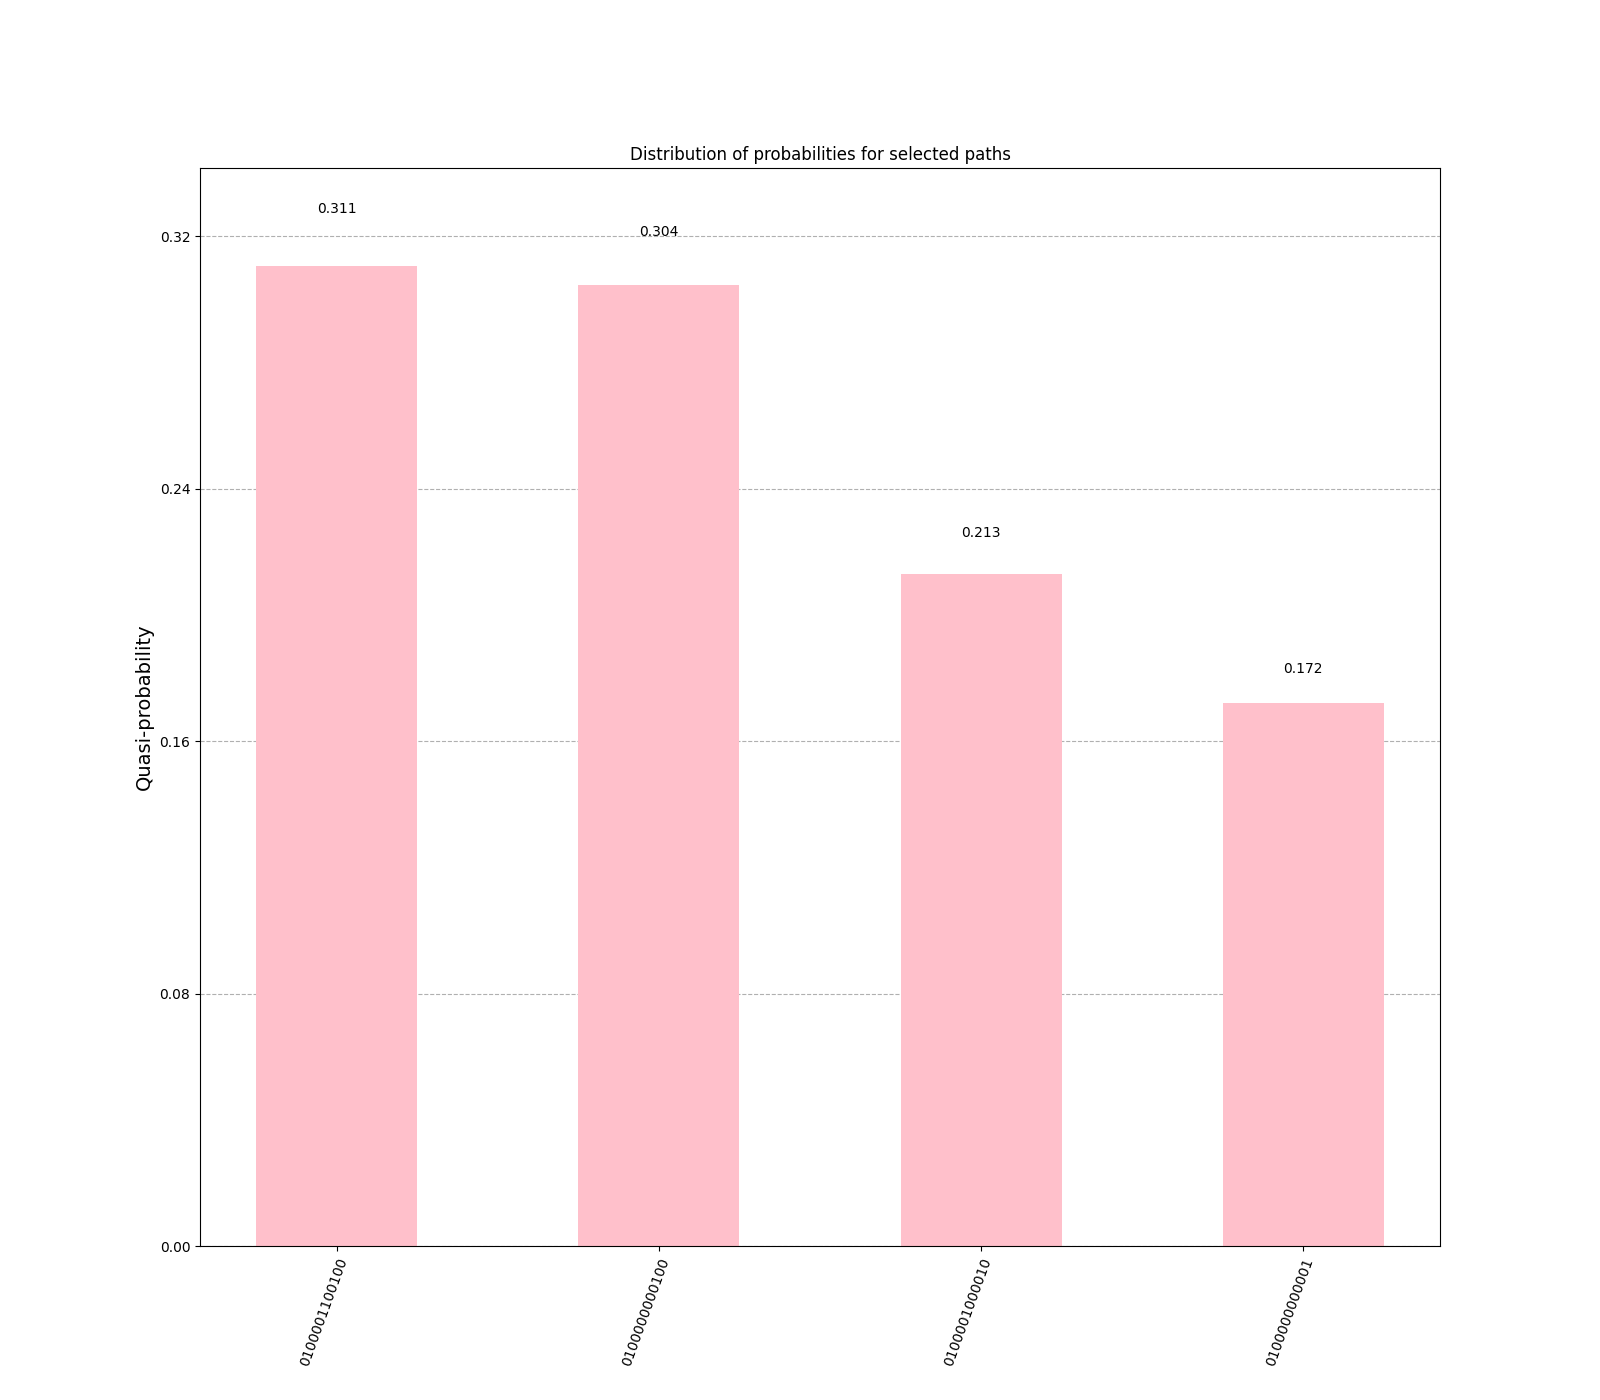

In [20]:
from IPython.display import Image, display  # type: ignore
!python 4_plot_distribution_probabilities.py qaoa_solver_infos_alpha_0.4217940239810756.npz  visu_total_dist visu_selected_dist edge
display(Image(filename='visu_selected_dist_0.png'))
# display(Image(filename=r'..\output\img\visu_tout_alpha_4.png'))

### Visualiser les chemins optimaux:

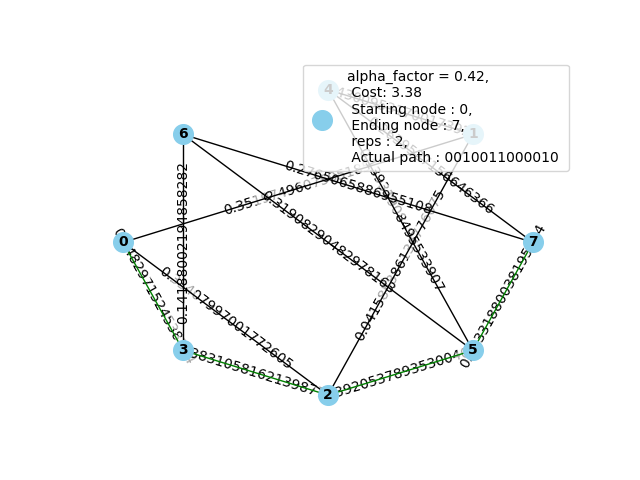

In [21]:
!python 5_plot_optimal_paths.py weighted_13_edges_rand_graph  qaoa_solver_infos_alpha_0.4217940239810756.npz opt_paths edge

display(Image(filename='opt_paths_0_alpha_0.42.png'))


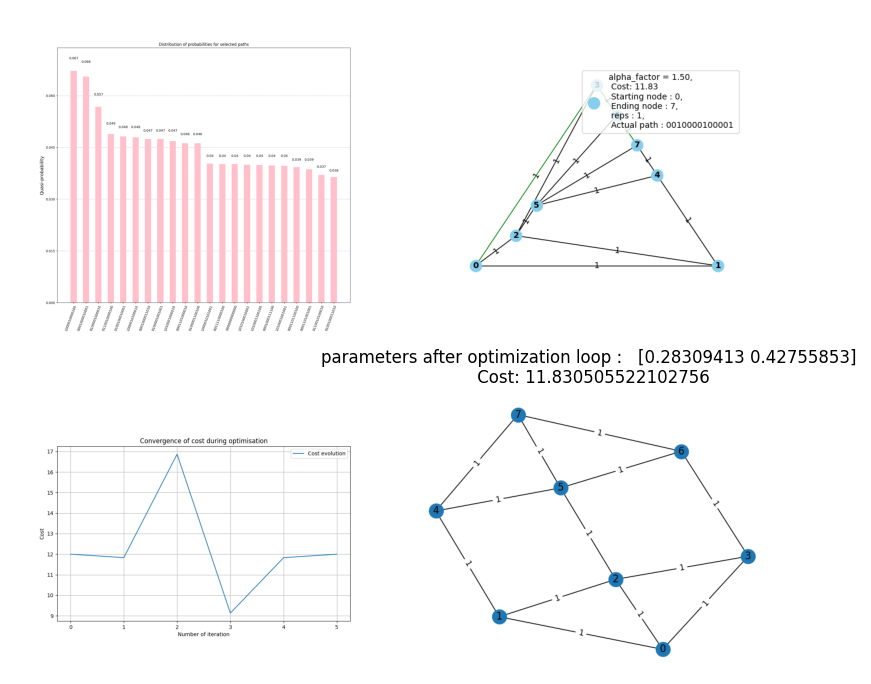

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chargement des quatre images
image1 = mpimg.imread("visu_selected_dist_0.png")
image2 = mpimg.imread("opt_paths_0_alpha_1.50.png")
image3 = mpimg.imread("cost_history_plot.png")
image4 = mpimg.imread("13_rand_graph_visu.png")

# Création de la figure et des sous-graphiques 2x2
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Ajout des images dans la grille
axs[0, 0].imshow(image1)
axs[0, 0].axis("off")  # Masquer les axes

axs[0, 1].imshow(image2)
axs[0, 1].axis("off")

axs[1, 0].imshow(image3)
axs[1, 0].axis("off")

axs[1, 1].imshow(image4)
axs[1, 1].axis("off")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
# plt.title(f'parameters after optimization loop : ')
# Sauvegarde de l'image combinée
# plt.savefig("res_for_5.png", bbox_inches="tight", pad_inches=0.1)
plt.savefig("13edges_opt_loop_1rep_Powell.png", dpi=500, bbox_inches="tight", pad_inches=0.1)
plt.show()
